<a href="https://colab.research.google.com/github/Paul-mwaura/Natural-Language-Processing/blob/main/Sentiment_Analysis(Text_Polarity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py) (with a few modifications of the script of course)  
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task.

**Import necessary modules**

In [ ]:
pip install textblob

In [ ]:
import pandas as pd
from textblob import TextBlob

Load the data

In [ ]:
 tweets = pd.read_csv('covidKE tweets.csv')

In [ ]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


## Text Preprocessing

We remove any special characters, punctuations and stopwords from the tweets.

In [ ]:
import re
import string
from nltk.corpus import stopwords

Let's design a function for this task

In [ ]:
regex = re.compile('[^a-zA-Z]')
def text_process(text):
    np = text.lower().split('#coronaviruskenya') # Remove the hashtag
    np = ''.join(np)
    np = [c for c in np if c not in string.punctuation]
    np = [c for c in np if c != '\n'] # Removing newline
    np = ''.join(np)
    np = np.split('https')[0] # Remove links
    np = regex.sub(' ', np) # Remove emojis and any non-letters
    #np = [word for word in np.split() if word not in stopwords.words('english')] # Remove stopwords
    return ' '.join(np)

In [ ]:
# Apply function to the text column
# We will overwrite the text column (after testing the function on a single tweet)

tweets['text'] = tweets['text'].apply(text_process)

In [ ]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,e v e r y d a y m i g h t n o t b e g ...,2020-03-23 16:17:58,1
1,1242123396684697603,t h e n e x t o n e w e e k,2020-03-23 16:17:49,0
2,1242123373188124673,l o c k d o w n n o w u h u r u k e n y a ...,2020-03-23 16:17:44,0
3,1242086219519012867,i n t e r n e t n e v e r f o r g e t w ...,2020-03-23 13:50:06,0
4,1242123367882330113,n t s a k e n y a d c i k e n y a i f ...,2020-03-23 16:17:43,0


## Sentiment Analysis

An example to show how we get the sentiment score/polarity for a single tweet

In [ ]:
TextBlob(tweets.text[5]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.0

Let's add a numerical column relating to text; text length 

In [ ]:
tweets['text length'] = tweets['text'].apply(len)

In [ ]:
tweets.head()

,tweet_id,text,created_at,likes,text length
0,1242123434466979841,e v e r y d a y m i g h t n o t b e g ...,2020-03-23 16:17:58,1,161
1,1242123396684697603,t h e n e x t o n e w e e k,2020-03-23 16:17:49,0,39
2,1242123373188124673,l o c k d o w n n o w u h u r u k e n y a ...,2020-03-23 16:17:44,0,193
3,1242086219519012867,i n t e r n e t n e v e r f o r g e t w ...,2020-03-23 13:50:06,0,173
4,1242123367882330113,n t s a k e n y a d c i k e n y a i f ...,2020-03-23 16:17:43,0,169


Now we design a function to apply to the text column to produce polarity for each tweet

In [ ]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [ ]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [ ]:
# Short form using lambda
##
#tweets['polarity'] = tweets['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
tweets.sample(10)

,tweet_id,text,created_at,likes,text length,polarity
927,1242083452020756485,y a l l e x p e c t i n g l a n d l o r ...,2020-03-23 13:39:06,4,197,0.0
363,1242106699542126592,s h o r t l y a f t e r t h e b r e a ...,2020-03-23 15:11:29,0,199,0.0
986,1242079103655837699,p l e a s e s t a y a t h o m e c o v ...,2020-03-23 13:21:49,2,103,0.0
867,1242087578687418369,o u r o w n k n e y a n s k w a n i n ...,2020-03-23 13:55:30,0,153,0.0
906,1242084245289480195,t o f i g h t t h i s c o v i d d ...,2020-03-23 13:42:15,1,227,0.0
427,1242103897482813441,i d o n t r e m e m b e r t h e l a s ...,2020-03-23 15:00:20,2,225,0.0
920,1242083697379115008,d a m n i t g i r l c a l l m e c o v ...,2020-03-23 13:40:04,1,125,0.0
391,1242105349798330369,y o u s t a n d i n f r o n t o f p e ...,2020-03-23 15:06:07,2,225,0.0
253,1242111906976018432,v i t a f o a m k e k e n y a h a s g i ...,2020-03-23 15:32:10,1,215,0.0
1139,1242067158202531840,m y c h u r c h i s o f f i c i a l l y ...,2020-03-23 12:34:21,0,101,0.0


Tweets with lowest polarity(-1)

In [ ]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,text length,polarity


Tweets with polarity 0

In [ ]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,text length,polarity
0,1242123434466979841,e v e r y d a y m i g h t n o t b e g ...,2020-03-23 16:17:58,1,161,0.0
1,1242123396684697603,t h e n e x t o n e w e e k,2020-03-23 16:17:49,0,39,0.0
2,1242123373188124673,l o c k d o w n n o w u h u r u k e n y a ...,2020-03-23 16:17:44,0,193,0.0
3,1242086219519012867,i n t e r n e t n e v e r f o r g e t w ...,2020-03-23 13:50:06,0,173,0.0
4,1242123367882330113,n t s a k e n y a d c i k e n y a i f ...,2020-03-23 16:17:43,0,169,0.0
...,...,...,...,...,...,...
1185,1242064075405905921,s i a y a e m e r g e n c y r e s p o n s ...,2020-03-23 12:22:06,4,227,0.0
1186,1242064012797530112,o l e i t u m b i t i m e t o p u t i ...,2020-03-23 12:21:51,1,209,0.0
1187,1242063970632163329,w h e n p e o p l e l o s e t r u s t ...,2020-03-23 12:21:41,1,173,0.0
1188,1242063856727396352,m w e n d w a f e l i x c i s n y a k u n d ...,2020-03-23 12:21:14,2,195,0.0


Tweets with highest polarity(1)

In [ ]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,text length,polarity


In [ ]:
# It is evident that almost half of the obtained tweets have polarity 0

Tweets with negative polarity

In [ ]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,text length,polarity


Tweets with positive polarity

In [ ]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,text length,polarity


## Some EDA

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Distribution of polarity**

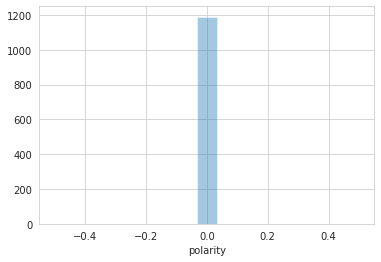

In [ ]:
sns.distplot(tweets['polarity'], bins=15, kde=False)

**Distribution of text length**

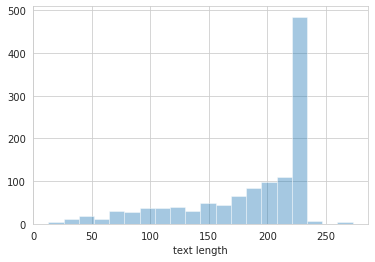

In [ ]:
sns.distplot(tweets['text length'], kde=False)

A jointplot to show relation of text length and polarity

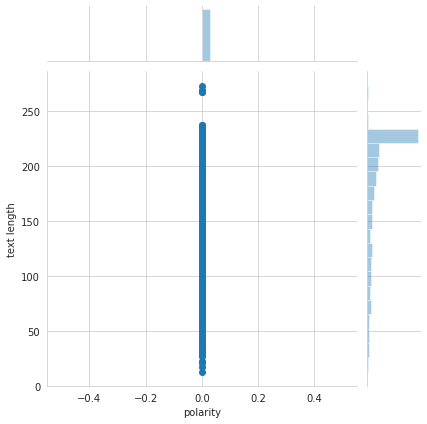

In [ ]:
sns.jointplot(x='polarity', y='text length', data=tweets)

Most lengthy(range from 60 to 100) tweets range polarity from -0.25 and 0.25 from the jointplot above  
This is roughly around polarity 0, so we wouldn't be wrong to say that most lengthy tweets(in this range) have polarity of 0, or more appealing, around polarity 0  
Let's get the mean length of tweets with polarity 0 to see that indeed this length lies in this range(60 to 100)

In [ ]:
tweets[tweets['polarity']==0]['text length'].mean()

185.14621848739495

To further visualize this fact, let's create the same plot but of hexagonal and regressional nature

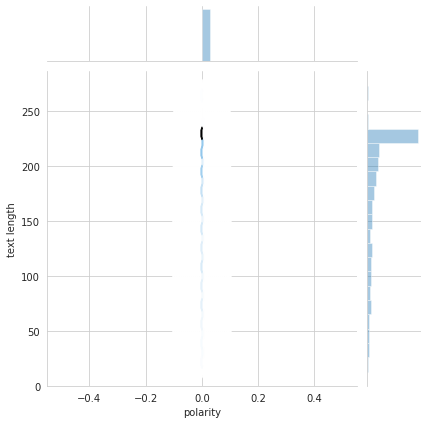

In [ ]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


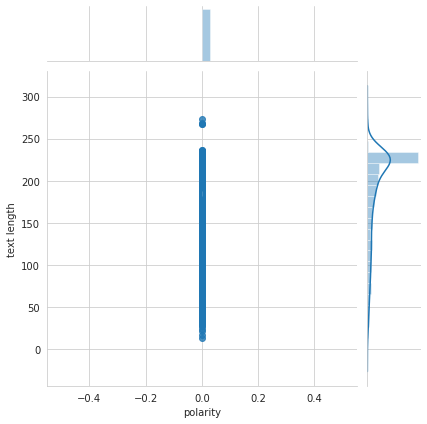

In [ ]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='reg')

From this jointplot we can clearly see that the kde on the upper side of the plot shows some normal distribution around polarity 0  
This justifies our above argument that most lengthy(our range of 'lengthy') tweets have polarity of 0 (or around 0)

## Project conclusion

Clearly, we have seen that like half of the tweets have polarity of around 0.  
Does this mean that when a population is under such fear and anxiety of an epidemic, their messages express no negativity or positivity but are more neutral?